In [15]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [16]:
# aceleração da gravidade (m/s)
g = 9.80665
# Área da seção transversal (m)
a = math.pi*0.0045845**2
# Coeficiente de arrasto de uma bala
Cd = 0.04
#Massa da bala (kg)
m = 0.0094
#Densidade do ar (kg/m^3)
ro = 1.2754

In [17]:
def modelo(d, lista_t):
    x = d[0]
    vx = d[1]
    y = d[2] 
    vy = d[3]
    
    P = m*g
    Fa = ((ro*a*c*v**2)/2)
    
    #velocidade m/s
    dxdt = vx
    dydt = vy
    dvxdt = 0
    dvydt = -((Fa + P)/m)
    
    k = [dxdt, dydt, dvxdt, dvydt]
    
    return k
    
    



In [ ]:
    senalfa = Y/(H+RT)
    cosalfa = X/(H+RT)
    if V>0:
        senbeta = Vy/V
        cosbeta = Vx/V
    else:
        senbeta = 0
        cosbeta = 1
    Fg = G*Mp*Ms/(H+RT)**2
    dar = p0*exp(-H/7500)
    Far = dar*V**2*Cd*A/2 
    if H>0:
        dXdt = Vx
        dYdt = Vy
        dVxdt = (-Far*cosbeta-Fg*cosalfa)/Ms
        dVydt = (-Far*senbeta-Fg*senalfa)/Ms
    else:
        dXdt = 0
        dYdt = 0
        dVxdt = 0
        dVydt = 0
    return [dXdt, dVxdt, dYdt, dVydt]

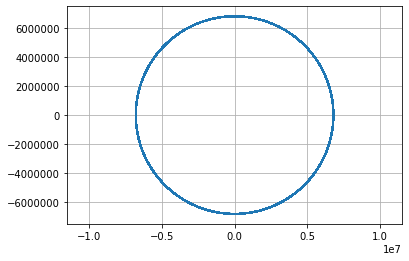

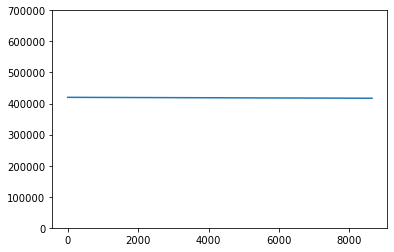

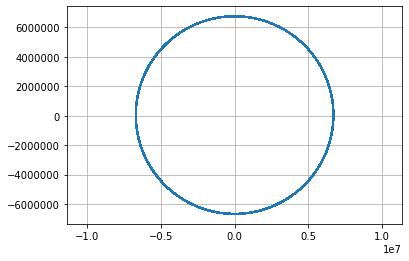

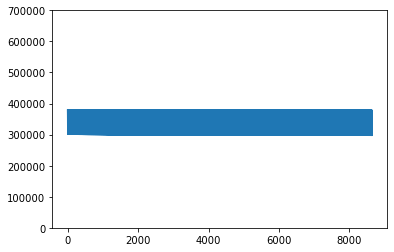

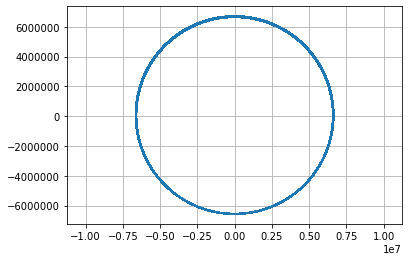

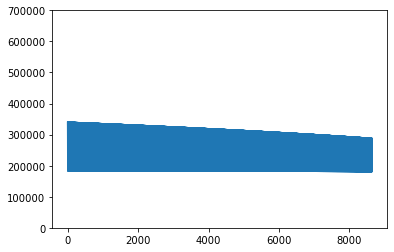

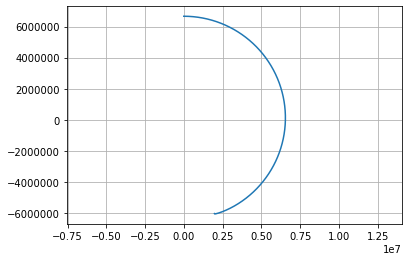

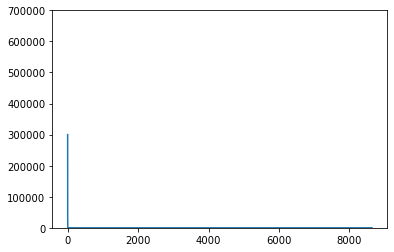

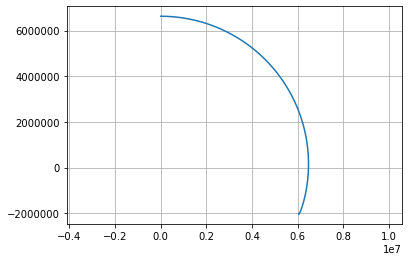

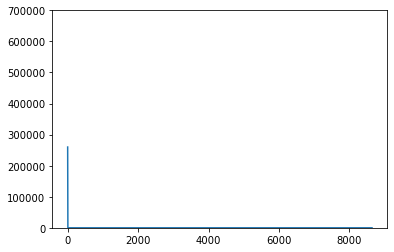

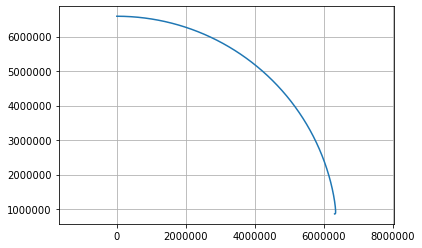

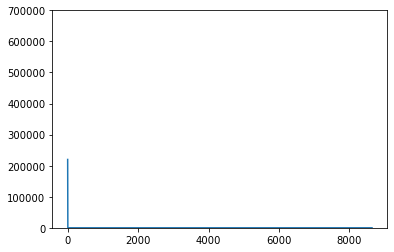

In [18]:
RT0 = 6.371e6
H0 = 420e3
H1 = 380e3 
H2 = 340e3
H3 = 300e3
H4 = 260e3
H5 = 220e3
R0 = RT0+H0
R1 = RT0+H1
R2 = RT0+H2
R3 = RT0+H3
R4 = RT0+H4
R5 = RT0+H5

V0 = sqrt(G*Mp/R0)
V1 = sqrt(G*Mp/R1)
V2 = sqrt(G*Mp/R2)
V3 = sqrt(G*Mp/R3)
V4 = sqrt(G*Mp/R4)
V5 = sqrt(G*Mp/R5)


S0 = [[0,V0,R0,0],[0,V0,R1,0],[0,V0,R2,0],[0,V0,R3,0],[0,V0,R4,0],[0,V0,R5,0]]
lista_t = np.arange(0,12*30*24*60*60,1)
altitudes = []
altitudes_tempo = [0,0,0,0,0,0]
j = 0
for i in S0:
    Sol=odeint(modelo, i, lista_t)
    plt.plot(Sol[:,0], Sol[:,2])
    plt.xlabel('')
    plt.ylabel('')
    plt.axis('equal')
    plt.grid(True)
    plt.show()
    H_lista = []
    for k in range(len(lista_t)):
        h = sqrt(Sol[k,0]**2+Sol[k,2]**2)-RT
        if h < 1:
            if altitudes_tempo[j] == 0:
                altitudes_tempo[j] = k
                j += 1
                break
    for k in range(len(lista_t)):
        h = sqrt(Sol[k,0]**2+Sol[k,2]**2)-RT
        H_lista.append(h)
    plt.plot(lista_t/3600,H_lista)
    plt.ylim((0,700000))
    plt.show()

    

In [19]:
print(altitudes_tempo)

[2638, 1848, 1456, 0, 0, 0]


In [22]:
altitudes_tempo = [0,0,0,2638, 1848, 1456]
altitudes = [420,380,340,300,260,220]

<module 'matplotlib.pyplot' from 'C:\\Users\\Lucas Franco\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

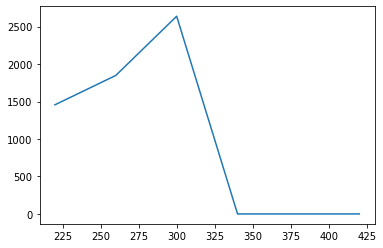

In [23]:
plt.plot(altitudes,altitudes_tempo)
plt